## Business Case: Walmart - Confidence Interval and CLT

#### About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


#### Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [1]:
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
import pylab
import scipy.stats as st
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale= 1)

In [2]:
df = pd.read_csv("C:/Users/srinj/Downloads/Scaler Academy Project/walmart_data.txt")

#### Analysing Basic Metrics and Non-Graphical Analysis : 

In [3]:
df.shape

(550068, 10)

In [4]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category              550068 non-null int64
Purchase                      550068 non-null int64
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
(df.isna().sum()/len(df))*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

no null values detected.

In [7]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

## Unique Values in each column : 
- 5891 unique customers 
- 3631 unique products  
- 7 different age groups 
- 3 different city 
- stay in current city from 0 to 5 years 
- Gender  , Marital status 
- 20 different product category 

In [8]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


#### Outliers in purchase

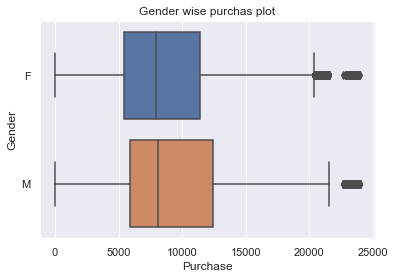

In [9]:
sns.boxplot(x="Purchase",data=df,y="Gender")
plt.title("Gender wise purchas plot")
plt.show()

In [10]:
Purchase_Q3=df["Purchase"].quantile(0.75)
Purchase_Q1=df["Purchase"].quantile(0.25)
IQR=Purchase_Q3-Purchase_Q1
Purchase_upperbound=Purchase_Q3+(1.5*IQR)
Purchase_upperbound

21400.5

In [11]:
outlier_data=df[df["Purchase"]>Purchase_upperbound]
len(outlier_data)

2677

In [12]:
df.shape

(550068, 10)

In [13]:
(2677/550068)*100

0.4866671029763593

#### We have 0.49% of outlier data

In [14]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [15]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [16]:
df["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [17]:
df["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [18]:
df["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

#### Converting relevant columns into category

In [19]:
df["Product_Category"] = df["Product_Category"].astype("str")
df["Marital_Status"] = df["Marital_Status"].astype("str")
df["Occupation"] = df["Occupation"].astype("str")
df["User_ID"] = df["User_ID"].astype("str")

In [20]:
df.describe(include="object")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


#### Redefining the fields Gender and martial status

In [22]:
df["Gender"].replace({"M":"Male","F":"Female"},inplace=True)
df["Marital_Status"].replace({"0":"Single","1":"Married"},inplace=True)

In [23]:
df["Age"].value_counts(normalize=True)*100

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

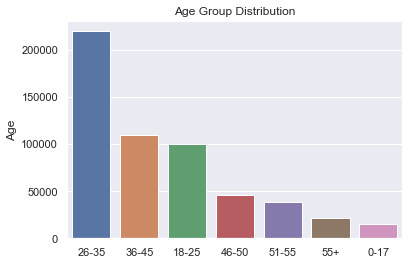

In [24]:
sns.barplot(x=df["Age"].value_counts().index,
           y=df["Age"].value_counts())
plt.title("Age Group Distribution")
plt.show()

Gender vs Age

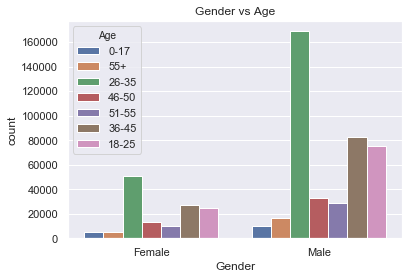

In [25]:
sns.countplot(x="Gender",data=df,hue="Age")
plt.title("Gender vs Age")
plt.show()

Age group vs purchase value

In [26]:
df.groupby(["Age"])["Purchase"].sum()

Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64

In [27]:
df.groupby(["Age"])["Purchase"].mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

##### Age between 26 and 35 spends the most, but the average spending for 51-55 age group is highest

In [28]:
df.head(0)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [29]:
df["City_Category"].value_counts(normalize=True)*100

B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64

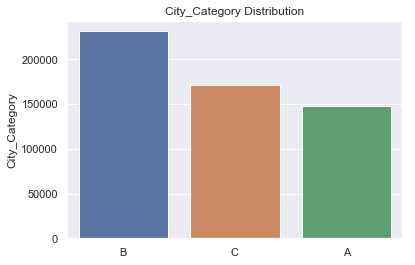

In [30]:
sns.barplot(x=df["City_Category"].value_counts().index,
           y=df["City_Category"].value_counts())
plt.title("City_Category Distribution")
plt.show()

##### City category "B" has the most number of customers

#### Product categorywise sales

In [31]:
(df.groupby("Product_Category")["Purchase"].sum()/df["Purchase"].sum()*100).sort_values(ascending=False)

Product_Category
1     37.482024
5     18.482532
8     16.765114
6      6.361111
2      5.269350
3      4.004949
16     2.847840
11     2.233032
10     1.978827
15     1.824420
7      1.195035
4      0.537313
14     0.392767
18     0.182310
9      0.125011
17     0.115363
12     0.104632
13     0.078665
20     0.018539
19     0.001165
Name: Purchase, dtype: float64

##### Product 1, 5 and 8 all together covers over 70% of total sales

In [32]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,Female,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,Female,0-17,10,A,2,Single,1,15200


In [33]:
df["Gender"].value_counts(normalize=True)*100

Male      75.310507
Female    24.689493
Name: Gender, dtype: float64

###### In business problem statement we have assumption of equal distribution of male and female but the data is biased towards male

### Various plots from data

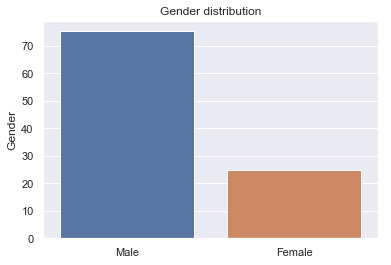

In [34]:
sns.barplot(x=df["Gender"].value_counts(normalize=True).index,y=df["Gender"].value_counts(normalize=True)*100)
plt.title("Gender distribution")
plt.show()

Gender by marital status

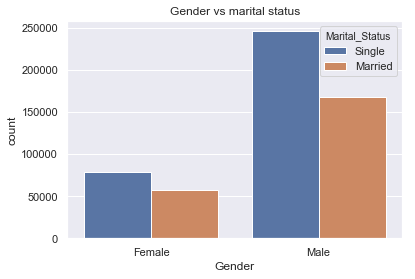

In [35]:
sns.countplot(x="Gender",data=df,hue="Marital_Status")
plt.title("Gender vs marital status")
plt.show()

Gender wise purchase

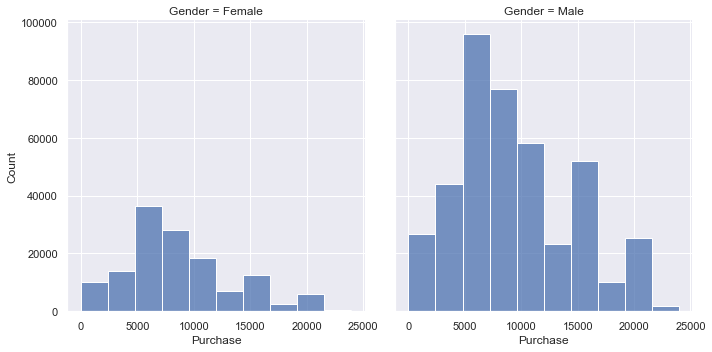

In [36]:
sns.displot(x = df["Purchase"], bins = 10, col=df["Gender"])
plt.show()

#### Making the dataset gender unbiased by random sampling from male data making the data equally distributed

In [37]:
df["Gender"].value_counts()

Male      414259
Female    135809
Name: Gender, dtype: int64

In [38]:
condition = df["Gender"]=="Male"
sample_male = df[condition].sample(n=135809)
sample_female = df.loc[df["Gender"]=="Female"]

In [39]:
sample_male.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
274115,1000229,P00270242,Male,18-25,10,C,1,Single,8,9790
352519,1000291,P00025542,Male,36-45,12,B,2,Single,8,8131
86076,1001279,P00115642,Male,36-45,1,A,2,Single,8,6033
430875,1000326,P00232442,Male,51-55,11,B,1,Married,5,7194
480771,1002004,P00042242,Male,46-50,19,C,1,Married,5,8743


In [40]:
df_ub = pd.concat([sample_male,sample_female])

ub: un-biased

In [41]:
df_ub["Gender"].value_counts(normalize=True)*100

Male      50.0
Female    50.0
Name: Gender, dtype: float64

Now we got gender unbiased dataset

### Finding confidence interval by Central limit theorem

In [42]:
sample_mean=np.mean(df_ub["Purchase"])
sample_mean

9077.452900765045

In [43]:
population_std = np.std(df["Purchase"])
population_std

5023.060827959972

In [44]:
df_ub.shape

(271618, 10)

In [45]:
sample_size=271618

Sample size is fairly large so we can use CLT

In [46]:
Z_critical=st.norm.ppf(q=0.975)
Z_critical

1.959963984540054

###### For 95% confidence interval we used q=0.975 as it is a 2 tailed distribution

In [47]:
Margin_of_error=Z_critical * (population_std/np.sqrt(sample_size))

In [48]:
lower_range = sample_mean - Margin_of_error
upper_range = sample_mean + Margin_of_error

In [49]:
print("95% Confidence interval lies beteween",lower_range, "and",upper_range )

95% Confidence interval lies beteween 9058.562670368217 and 9096.343131161873


#### Sample mean (9084.438391417358) falls inside the confidence interval

### Purchase confidence interval for male using original dataset

In [50]:
df_male=df.loc[df["Gender"]=="Male"]

In [51]:
df_male["Gender"].value_counts()

Male    414259
Name: Gender, dtype: int64

##### Selecting a sample of size 10000 from 414259 records

In [52]:
male_sample=df.sample(n=10000)

In [53]:
male_mean=np.mean(male_sample["Purchase"])
male_mean

9174.9345

In [54]:
male_pop_sd=np.std(df_male["Purchase"])
male_pop_sd

5092.180063635943

In [55]:
MOE=Z_critical * (male_pop_sd/np.sqrt(10000))
MOE

99.80489527519329

In [56]:
Male_lr = male_mean - MOE
Male_ur = male_mean + MOE

In [57]:
round(Male_lr,2)

9075.13

In [58]:
round(Male_ur,2)

9274.74

#### Mean purchase value for male sample is approx 9179.

#### 95% confidence interval for male purchase value is (9079.34, 9278.95)

### Purchase confidence interval for male using original dataset

In [59]:
df_female=df[df["Gender"]=="Female"]
df_female["Gender"].value_counts()

Female    135809
Name: Gender, dtype: int64

##### Sampling 10000 records

In [60]:
f_sample=df_female.sample(n=10000)

In [61]:
f_mean=np.mean(f_sample["Purchase"])
f_mean

8803.8137

In [62]:
f_pop_std=np.std(df_female["Purchase"])
f_pop_std

4767.215738016988

In [63]:
MOE_f=Z_critical * (f_pop_std/np.sqrt(10000))
MOE_f

93.4357115304583

In [64]:
f_lr=f_mean-MOE_f
f_ur=f_mean+MOE_f

In [65]:
round(f_lr,2)

8710.38

In [66]:
round(f_ur,2)

8897.25

#### Mean purchase value for female sample is approx 8704.

#### 95% confidence interval for female purchase value is (8610.44, 8797.31)

In [67]:
df.head(0)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


## Confidence interval for Purchase value between different marital status

In [68]:
df["Marital_Status"].value_counts()

Single     324731
Married    225337
Name: Marital_Status, dtype: int64

#### For single

In [69]:
df_single=df.loc[df["Marital_Status"]=="Single"]
single_sample=df.sample(n=10000)
single_mean=np.mean(single_sample["Purchase"])
single_pop_sd=np.std(df_single["Purchase"])
MOE_single=Z_critical * (single_pop_sd/np.sqrt(10000))
Single_lr = single_mean - MOE_single
Single_ur = single_mean + MOE_single

In [70]:
round(Single_lr,2)

9170.57

In [71]:
round(Single_ur,2)

9367.64

In [72]:
round(single_mean,2)

9269.1

#### Mean purchase value for single sample is approx 9256.54.

#### 95% confidence interval for single purchase value is (9158.0, 9355.07)

#### For married

In [73]:
df_married=df.loc[df["Marital_Status"]=="Married"]
married_sample=df.sample(n=10000)
married_mean=np.mean(married_sample["Purchase"])
married_pop_sd=np.std(df_married["Purchase"])
MOE_married=Z_critical * (married_pop_sd/np.sqrt(10000))
married_lr = married_mean - MOE_married
married_ur = married_mean + MOE_married

In [74]:
round(married_lr,2)

9144.48

In [75]:
round(married_ur,2)

9341.13

In [76]:
round(married_mean,2)

9242.8

#### Mean purchase value for married sample is approx 9235.74

#### 95% confidence interval for single purchase value is (9137.41, 9334.07)

## Observations

#### -Most of the customers (close to 80%) are between the age 18 and 45

#### -The data has 75% of male and 25% of female customers. Unlike the problem statement the given data is biased towards male

#### -The highest customer category is male between 26 to 35 years of age

#### -Age between 26 and 35 spends the most, but the average spending for 51-55 age group is highest

#### -City category "B" has the most number of customers

#### -Product 1, 5 and 8 all together covers over 70% of total sales

#### -95% confidence interval for purchase value of a male customer is (9079.34, 9278.95)

#### -95% confidence interval for purchase value of a female customer is (8610.44, 8797.31)

#### -95% confidence interval for purchase value of a single customer is (9158.0, 9355.07)

#### -95% confidence interval for purchase value of a married customer is (9137.41, 9334.07)

## Recommendations

#### (1) Increase stores in "C" category cities and make them close to "B". Collaborate with local vendors in "A" category city as the customers are lowest in that. Acquire customers from local vendor.

#### (2) Although the data is gender biased, but concluding from this data: start "buy 1 get 1" types offer in female hygiene product. Also start special offers for women specific holidays.

#### (3) Age group 51-55 has highest average sales value. To maximize this analyse their purchase pattern and create recomender system like "people also bought" or pair up their product with other relevant things (like for buying shoe they will get a combo offer in shoe + socks, but no offer on buying shoe only). It will maximize the sales for that category.

#### (4) Age group with the highest customer count is 26-35, the above technique will work in this case also, but try to decrease number of units in daily use product. (for example a soap pack previously had 5 shops, but now it will have 3 soaps, and give discount on buying 2 soap packs.)